In [1]:
import numpy as np
import pandas as pd

In [2]:
d = pd.DataFrame({'name':['a','b','c'],
                  'id':[10,11,np.NaN],
                  'year':[2019,np.NaN,2020]})
d

,name,id,year
0,a,10.0,2019.0
1,b,11.0,NaN
2,c,NaN,2020.0


In [3]:
d.isnull().sum()

name    0
id      1
year    1
dtype: int64

In [6]:
d[d['id'].isnull() == True]

,name,id,year
2,c,NaN,2020.0


## Day 4
- Data Preprocessing
- Introduction to Scikit learn
- Scaling Techniques

In [2]:
df = pd.read_csv('Advertisement.csv')

In [8]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
df.shape

(200, 5)

In [3]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

### Outliers
- Outliers are different from other data points in dataset which affects training processof a machine learning algorithms
- For handiling outlier, apply scaling techniques using scikit learn 

In [12]:
import matplotlib.pyplot as plt

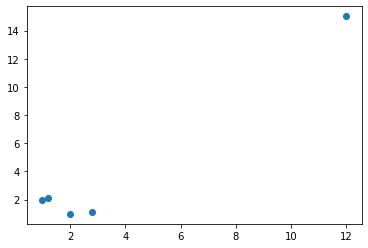

In [14]:
x = [1,1.2,2,2.8,12]
y = [2,2.1,1,1.1,15]
plt.scatter(x,y)

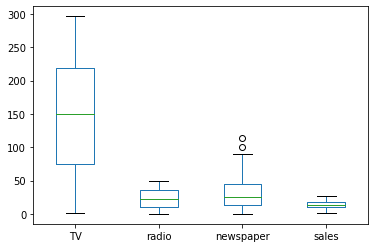

In [15]:
df.plot(kind = 'box')

### Boxplot
- min
- Q1(25%)
- Q2 (50%)
- Q3 (75%)
- max

In [16]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [17]:
df.mean()

TV           147.0425
radio         23.2640
newspaper     30.5540
sales         14.0225
dtype: float64

In [19]:
Q1 = df.quantile(0.25)
Q1

TV           74.375
radio         9.975
newspaper    12.750
sales        10.375
Name: 0.25, dtype: float64

In [20]:
Q3 = df.quantile(0.75)
Q3

TV           218.825
radio         36.525
newspaper     45.100
sales         17.400
Name: 0.75, dtype: float64

In [21]:
IQR = Q3 - Q1
IQR

TV           144.450
radio         26.550
newspaper     32.350
sales          7.025
dtype: float64

In [31]:
minVal = (Q1 - 1.5*IQR)
maxVal = (Q3 + 1.5*IQR)
print(maxVal)

TV           435.5000
radio         76.3500
newspaper     93.6250
sales         27.9375
dtype: float64


In [23]:
df[((df < minVal) | (df > maxVal))]

,TV,radio,newspaper,sales
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [24]:
df[((df < minVal) | (df > maxVal)).any(axis = 1)]

,TV,radio,newspaper,sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [28]:
## any(): Returns True, if any of the item is True, else False, if all items are empty
any_df = pd.DataFrame([[2,np.NaN],[np.NaN, np.NaN],[1,np.NaN]])
any_df

,0,1
0,2.0,NaN
1,NaN,NaN
2,1.0,NaN


In [29]:
any_df.any()

0     True
1    False
dtype: bool

- Many Machine learning models performs faster when all the data points are on relatively similar scale
- **Scaling is used to compress all the values into a fixed range (0 to 1 or -2 to 3)

## Scikit Learn
- Scikit Learn is one of the library in python mainly used for machine models.
- This library contains Machine learning models, preprocessing models, etc..
- https://scikit-learn.org/

In [ ]:
pip install sklearn

In [5]:
import sklearn

In [6]:
from sklearn import preprocessing

### Scaling Techniques
- Min Max Scaler
- Robust Scaler
- Standard
- Normalizer
- etc...

### Min Max Scaler
- It scales the data between 0 to 1(or -1 to 1)
    - [Xi - min(X)] / [max(X) - min(X)]

In [34]:
df.head(1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1


In [38]:
print(df['TV'].min())
print(df['TV'].max())

0.7
296.4


In [39]:
(230.1 - 0.7) / (296.4 - 0.7)

0.7757862698681096

**Apply Min Max Scaler model**

In [7]:
m = preprocessing.MinMaxScaler()
m

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
m2 = m.fit_transform(df)
m2

array([[0.77578627, 0.76209677, 0.60598065, 0.80708661],
       [0.1481231 , 0.79233871, 0.39401935, 0.34645669],
       [0.0557998 , 0.92540323, 0.60686016, 0.30314961],
       [0.50997633, 0.83266129, 0.51187335, 0.66535433],
       [0.60906324, 0.21774194, 0.51099384, 0.44488189],
       [0.02705445, 0.9858871 , 0.65699208, 0.22047244],
       [0.19208657, 0.66129032, 0.20404573, 0.4015748 ],
       [0.4041258 , 0.39516129, 0.09938434, 0.45669291],
       [0.02671627, 0.04233871, 0.00615655, 0.12598425],
       [0.67331755, 0.05241935, 0.18381706, 0.35433071],
       [0.2211701 , 0.11693548, 0.21020229, 0.27559055],
       [0.72370646, 0.48387097, 0.03254178, 0.62204724],
       [0.07811972, 0.70766129, 0.5769569 , 0.2992126 ],
       [0.32735881, 0.15322581, 0.06068602, 0.31889764],
       [0.68785932, 0.66330645, 0.40193492, 0.68503937],
       [0.65843761, 0.96169355, 0.46262093, 0.81889764],
       [0.22691917, 0.73790323, 1.        , 0.42913386],
       [0.94927291, 0.7983871 ,

In [43]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
m2 = pd.DataFrame(m2, columns = df.columns)
m2

,TV,radio,newspaper,sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882
5,0.027054,0.985887,0.656992,0.220472
6,0.192087,0.661290,0.204046,0.401575
7,0.404126,0.395161,0.099384,0.456693
8,0.026716,0.042339,0.006157,0.125984
9,0.673318,0.052419,0.183817,0.354331


In [10]:
import seaborn as sns

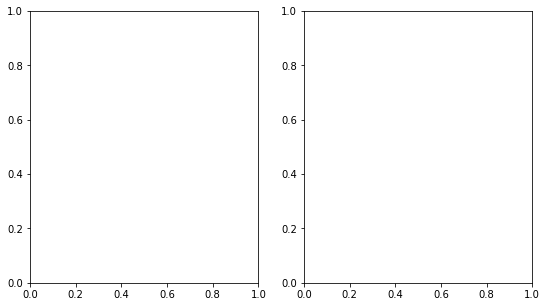

In [14]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (9,5))

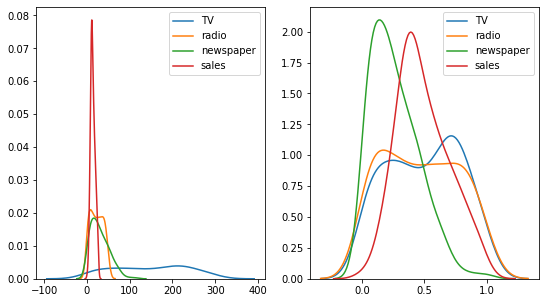

In [17]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (9,5))
sns.kdeplot(df['TV'], ax = ax1)
sns.kdeplot(df['radio'], ax = ax1)
sns.kdeplot(df['newspaper'], ax = ax1)
sns.kdeplot(df['sales'], ax = ax1)

sns.kdeplot(m2['TV'], ax = ax2)
sns.kdeplot(m2['radio'], ax = ax2)
sns.kdeplot(m2['newspaper'], ax = ax2)
sns.kdeplot(m2['sales'], ax = ax2)

### Robust Scaler
- It is mainly used for dataset which contains outliers
- Scaling between IQR(25% to 75%)
    - [Xi - Q1(X)] / [Q3(X) - Q1(X)]
        - Q1 - 25%(lower quartile)
        - Q2 - 50%(Median)
        - Q3 - 75%(Upper Quartile)

In [18]:
rb = preprocessing.RobustScaler()
rb

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [19]:
rb2 = rb.fit_transform(df)
rb2

array([[ 5.56247837e-01,  5.61205273e-01,  1.34312210e+00,
         1.30960854e+00],
       [-7.28625822e-01,  6.17702448e-01,  5.98145286e-01,
        -3.55871886e-01],
       [-9.17618553e-01,  8.66290019e-01,  1.34621329e+00,
        -5.12455516e-01],
       [ 1.21149187e-02,  6.93032015e-01,  1.01236476e+00,
         7.97153025e-01],
       [ 2.14953271e-01, -4.55743879e-01,  1.00927357e+00,
         0.00000000e+00],
       [-9.76462444e-01,  9.79284369e-01,  1.52241113e+00,
        -8.11387900e-01],
       [-6.38629283e-01,  3.72881356e-01, -6.95517774e-02,
        -1.56583630e-01],
       [-2.04569055e-01, -1.24293785e-01, -4.37403400e-01,
         4.27046263e-02],
       [-9.77154725e-01, -7.83427495e-01, -7.65069552e-01,
        -1.15302491e+00],
       [ 3.46486674e-01, -7.64595104e-01, -1.40649150e-01,
        -3.27402135e-01],
       [-5.79093112e-01, -6.44067797e-01, -4.79134467e-02,
        -6.12099644e-01],
       [ 4.49636552e-01,  4.14312618e-02, -6.72333849e-01,
      